In [430]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline


# Reading the data

In [431]:
#Reading the data
hsg=pd.read_csv("Housing.csv")

In [432]:
hsg

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [433]:
hsg.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [434]:
hsg.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [435]:
hsg.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [436]:
hsg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Data Visualisation and outliers treatment

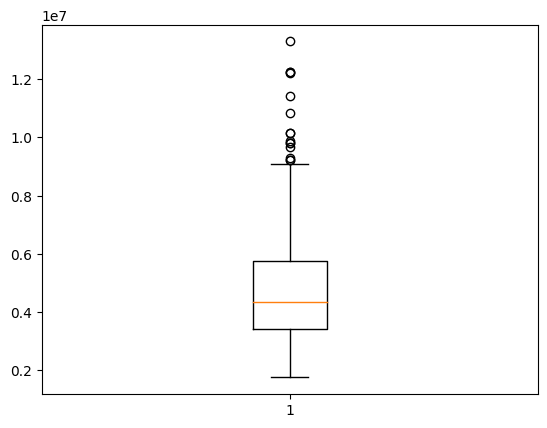

In [437]:
plt.boxplot(hsg.price)
Q1 = hsg.price.quantile(0.25)
Q3 = hsg.price.quantile(0.75)
IQR = Q3 - Q1
housing = hsg[(hsg.price >= Q1 - 1.5*IQR) & (hsg.price <= Q3 + 1.5*IQR)]

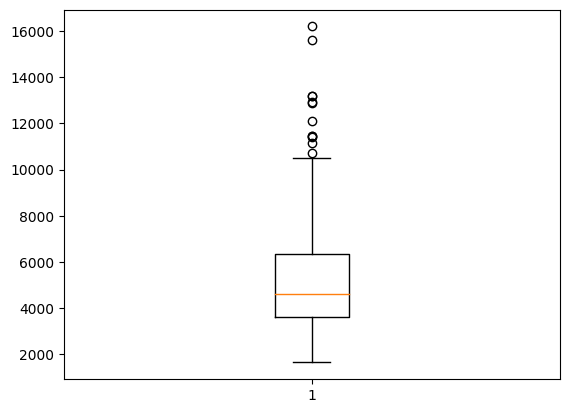

In [438]:
plt.boxplot(hsg.area)
Q1 = hsg.area.quantile(0.25)
Q3 = hsg.area.quantile(0.75)
IQR = Q3 - Q1
housing = hsg[(hsg.area >= Q1 - 1.5*IQR) & (hsg.area <= Q3 + 1.5*IQR)]

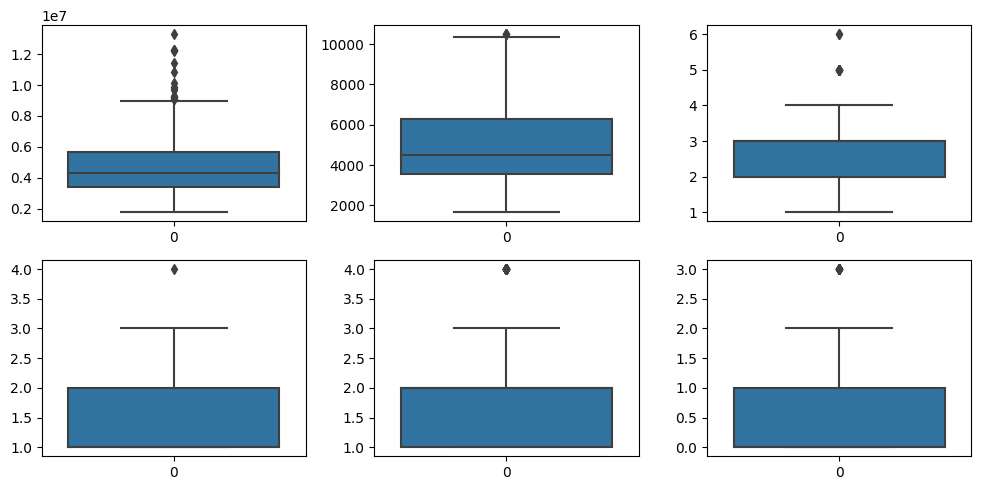

In [439]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

# Data Preparation

The Data is loaded and none values are removed or replaced.

In [440]:
hsg.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [441]:
hsg=hsg.replace('yes', 1)
hsg=hsg.replace('no',0)

In [442]:
status = pd.get_dummies(hsg['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [443]:
status = pd.get_dummies(hsg['furnishingstatus'],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [444]:
hsg=pd.concat([hsg,status],axis=1)
hsg.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [445]:
hsg.drop(['furnishingstatus'], axis = 1, inplace = True)
hsg.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


# Correlation of data

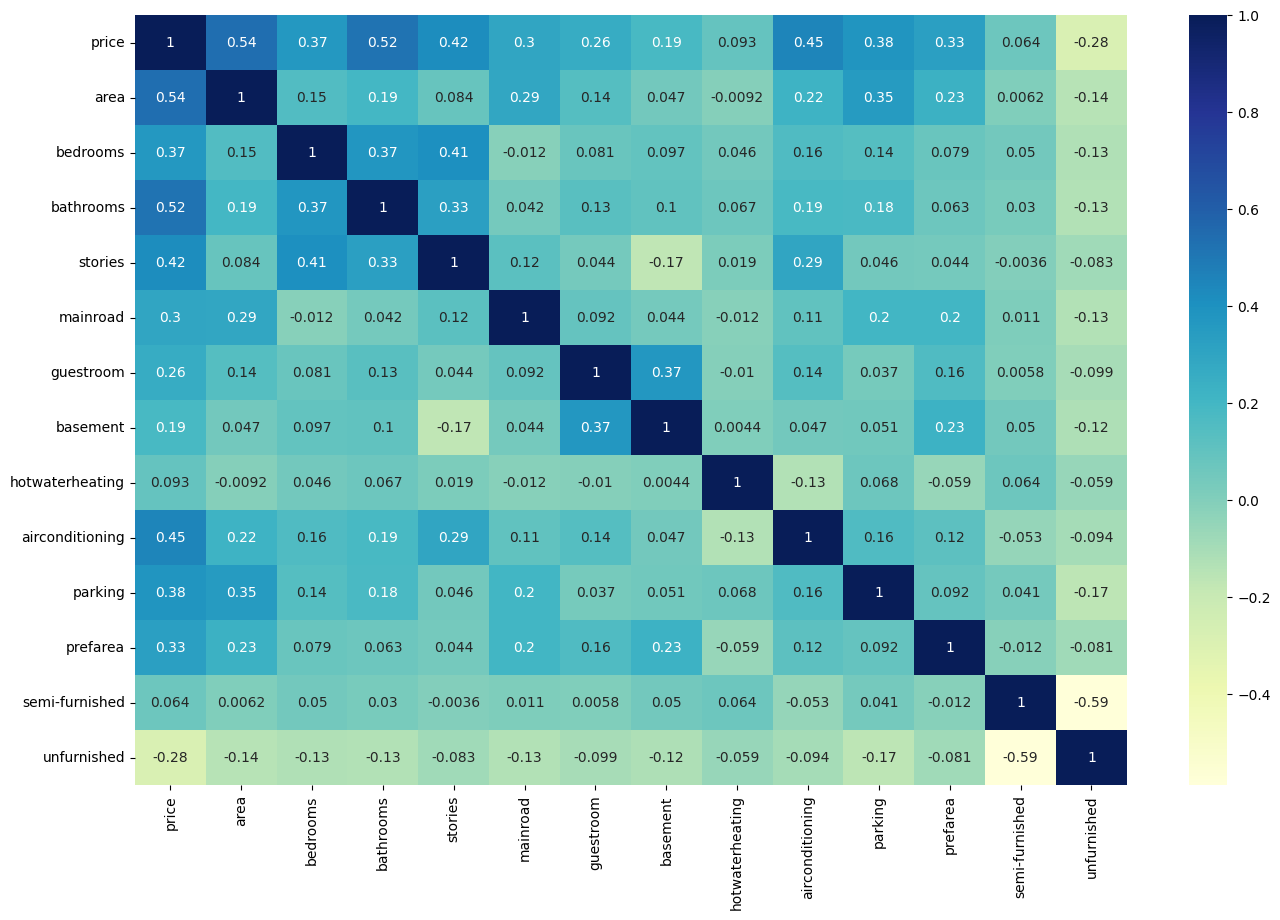

In [446]:

plt.figure(figsize = (16, 10))
sns.heatmap(hsg.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Splitting

In [447]:

y= hsg.pop('price')
x = hsg
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


# Scaling


In [448]:

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)



# Model Building

In [449]:
#Model Building
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [450]:
model.coef_

array([ 2.46500117e+02,  1.23598232e+05,  9.74868349e+05,  4.43449800e+05,
        5.09526408e+05,  4.68590012e+05,  3.33429684e+05,  1.21578088e+06,
        8.83342182e+05,  2.29916792e+05,  6.54531632e+05, -4.73390653e+04,
       -4.49195874e+05])

In [451]:
model.intercept_

-30233.854363188148

In [452]:
y_pred=model.predict(x_test)

In [453]:
x_test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
239,4000,3,1,2,1,0,0,0,0,1,0,0,0
113,9620,3,1,1,1,0,1,0,0,2,1,0,0
325,3460,4,1,2,1,0,0,0,1,0,0,1,0
66,13200,2,1,1,1,0,1,1,0,1,0,0,0
479,3660,4,1,2,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,3000,4,1,3,1,0,1,0,1,2,0,1,0
525,3640,2,1,1,1,0,0,0,0,0,0,0,1
245,5360,3,1,2,1,0,0,0,0,2,1,0,1
7,16200,5,3,2,1,0,0,0,0,0,0,0,1


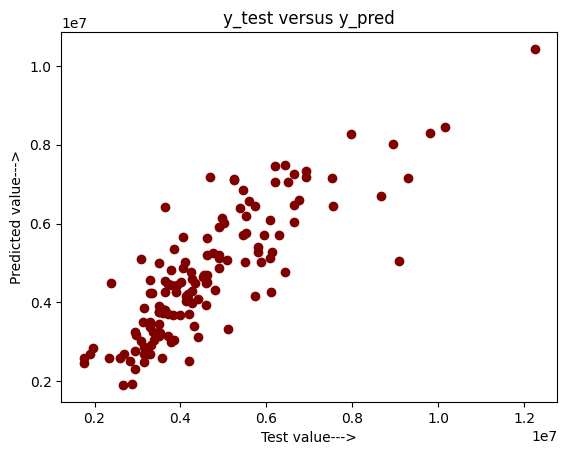

In [454]:
plt.scatter(y_test,y_pred, c='maroon')
x=y
# plt.plot(x,y,c='k')   
plt.title('y_test versus y_pred')
plt.xlabel('Test value--->')                         
plt.ylabel('Predicted value--->') 
plt.savefig("model graph")
plt.show()

In [455]:
per_error = 100*(y_pred-y_test)/y_test

tst = pd.DataFrame({'Predicted Price':y_pred.astype('int64'), 'Actual Price':y_test, '% Error':per_error})
tst


,Predicted Price,Actual Price,% Error
239,3927772,4585000,-14.334297
113,6087531,6083000,0.074493
325,4524346,4007500,12.896992
66,7177736,6930000,3.574835
479,2778921,2940000,-5.478858
...,...,...,...
319,5647669,4060000,39.105172
525,2592871,2345000,10.570223
245,4698265,4550000,3.258575
7,8452894,10150000,-16.720252


In [456]:
print('The root Mean Squared error(i.e RMSE) is :',mean_squared_error(y_test,y_pred,squared=False))
print('The mean absolute error is : ',mean_absolute_error(y_test,y_pred))

The root Mean Squared error(i.e RMSE) is : 969213.6845794243
The mean absolute error is :  717605.4932676217


In [457]:
print('The R2 score is: ',r2_score(y_test,y_pred))

The R2 score is:  0.6956489291232408


# Predicting from different input data

In [458]:

n=np.array([8420,4,2,3,0,1,1,1,0,1,0,0,0])
n=n.reshape(1,-1)
y=model.predict(n)[0]

/Users/apps/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [459]:
print('The predicted price is:',y,'Rs/-')

The predicted price is: 8067493.526754322 Rs/-


# Model Deployment

In [460]:

import joblib

joblib.dump(model, "clf.pkl")

['clf.pkl']